In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from ipywidgets import interact, widgets
#from IPython.display import display
import scipy.linalg
import itertools
import scipy.misc as sc
#from IPython.core.display import display, HTML
#display(HTML("<style>.container { width:95% !important; }</style>"))
from IPython import display
import pylab as pl
import time
from scipy import signal
from scipy import io
from skimage import transform
# import cupy as cp
import hdf5storage
import pywt
import copy
import math

import h5py

## Load Data

In [2]:
#h=hdf5storage.loadmat('C:\Research\RandoscopePSFS\\psf_2_5um_NovMono_comps.mat')  ## rank 12, z downsample by 4 (x,y,r,z)
#weights=hdf5storage.loadmat('C:\Research\RandoscopePSFS\\psf_2_5um_NovMono_weights.mat')

# h=scipy.io.loadmat('C:\Research\RandoscopePSFS\\SVD_2_5um_PSF_5um_1_ds4_dsz1_comps_green_SubAvg.mat')  ## rank 12, z downsample by 4 (x,y,r,z)
# weights=scipy.io.loadmat('C:\Research\RandoscopePSFS\\SVD_2_5um_PSF_5um_1_ds4_dsz1_weights_green_SubAvg.mat')

# h_file=h5py.File('../data/PSFs/SVD_2_5um_PSF_5um_1_ds2_components_green_SubAvg.mat')  ## rank 12, z downsample by 4 (x,y,r,z)
# weights_file=h5py.File('../data/PSFs/SVD_2_5um_PSF_5um_1_ds2_weights_interp_green_SubAvg.mat')

# for k, v in h_file.items():
#     h = np.array(v)
    
# for k, v in weights_file.items():
#     weights = np.array(v)

h = np.load('../data/PSFs/processed/rank24_z0_ds2_normalized/comps.npy')
weights = np.load('../data/PSFs/processed/rank24_z0_ds2_normalized/weights.npy')

h = h.transpose(3, 2, 1, 0)
weights = weights.transpose(3, 2, 1, 0)

In [3]:
# xtrue=plt.imread('C:\Research\RandoscopePSFS\\resTarget_2_MMStack_Img_15_000_000.ome_Z_030_T_001_res_target_paper.png')
# plt.imshow(xtrue)
# plt.colorbar()

In [4]:
# restarget=hdf5storage.loadmat('../data/real-data/realData.mat')
# restarget=restarget['resTarget']
# restarget=restarget/np.max(restarget)
# y=np.maximum(restarget,0)
# plt.imshow(y)
# plt.colorbar()
# print(np.min(y))

In [5]:
import PIL
from PIL import Image

obj_dims = (648, 486)

In [6]:
res_target_path = '../data/real-data/res_target_z1.tif'

x = np.array(Image.open(res_target_path).resize(obj_dims, resample=PIL.Image.NEAREST))
x = x / np.max(x)
x = np.maximum(x, 0)

In [7]:
# h=h['array_out']
# weights=weights['array_out']
# # make sure its (x,y,z,r)
# h=np.swapaxes(h,2,3)
# weights=np.swapaxes(weights,2,3)
# # Normalize weights to have maximum sum through rank of 1
# weights_norm = np.max(np.sum(weights[np.shape(weights)[0]//2-1,np.shape(weights)[1]//2-1,:,:],1))
# weights = weights/weights_norm;

# #normalize by norm of all stack. Can also try normalizing by max of all stack or by norm of each slice
# h=h/np.linalg.norm(np.ravel(h))

In [8]:
# psf=np.zeros((np.shape(weights)[0],np.shape(weights)[1]))
# for r in range (0,np.shape(weights)[3]):
#     psf=psf+np.multiply(h[:,:,29,r],weights[:,:,29,r])
# psf=psf/np.max(psf)
# plt.imshow(psf)
# plt.colorbar()

In [9]:
ccL = np.shape(h)[1]//2
ccU = 3*np.shape(h)[1]//2
rcL = np.shape(h)[0]//2
rcU = 3*np.shape(h)[0]//2
#H = np.fft.fft2(np.fft.ifftshift(np.fft.ifftshift(pad4d(h),0),1),axes=(0,1))

#H = np.fft.fft2(pad4d(h),axes=(0,1))
#Hconj = np.conj(H)

#Hnp = np.fft.fft2(np.fft.ifftshift(np.fft.ifftshift(h,0),1),axes=(0,1))
Hnp=np.zeros(np.shape(h))
Hconjnp=np.zeros(np.shape(h))
H=[]
Hconj=np.zeros(np.shape(h))
for i in range (np.shape(h)[3]):
    for z in range(np.shape(h)[2]):
        Hnp[:,:,z,i]=(np.fft.fft2(h[:,:,z,i]))
        Hconjnp[:,:,z,i]=(np.conj(Hnp[:,:,z,i]))
        #H.append(np.fft.fft2(pad2d(h[:,:,z,i])))
        #Hconj.append(np.conj(H[i]))
#Hnp=np.swapaxes(np.swapaxes(np.array(Hnp),0,1),1,2)
#H=crop4d(H,rcL,rcU,ccL,ccU)
#Hconjnp = np.swapaxes(np.swapaxes(np.array(Hconjnp),0,1),1,2)

#H=np.swapaxes(np.swapaxes(np.array(H),0,1),1,2)
#H=crop4d(H,rcL,rcU,ccL,ccU)
#Hconj = np.swapaxes(np.swapaxes(np.array(Hconj),0,1),1,2)

/home/rshuai/research/u-net-reconstruction/venv_unet/lib/python3.6/site-packages/ipykernel_launcher.py:17: ComplexWarning: Casting complex values to real discards the imaginary part


In [10]:
# x=plt.imread('C:\Research\RandoscopePSFS\\waterbear.jpg')
# x=transform.resize(x[:,80:500], (np.shape(h)[0]//2,np.shape(h)[1]//2), order=3)
# x=np.mean(x,2)
# x=x*(x>0.2)
# x=x/np.max(x)
# x=pad2d(x)
# c=np.zeros((1,648))
# x=np.vstack((x,c))
# # point source
# x2=np.zeros((np.shape(h)[0],np.shape(h)[1]))
# x2[np.shape(h)[0]//2:np.shape(h)[0]//2+3,np.shape(h)[1]//2:np.shape(h)[1]//2+3]=1

# plt.imshow(x)
# print(np.sum(np.abs(x)))

## Forward model

In [11]:
def pad2d (x):
    Ny=np.shape(x)[0]
    Nx=np.shape(x)[1]
    return np.pad(x,((Ny//2,Ny//2),(Nx//2,Nx//2)),'constant', constant_values=(0))

def pad4d(x):
    Ny=np.shape(x)[0]
    Nx=np.shape(x)[1]
    return np.pad(x,((Ny//2,Ny//2),(Nx//2,Nx//2),(0,0),(0,0)),'constant', constant_values=(0))

def crop4d(x,rcL,rcU,ccL,ccU):
    return x[rcL:rcU,ccL:ccU,:,:]

def crop2d(x,rcL,rcU,ccL,ccU):   
    return x[rcL:rcU,ccL:ccU]

def nocrop(x):
    return x

def nopad(x):
    return x

def A_2d_svd(x,H,weights,pad,mode='shift_variant'): #can remove some ifftshifts
    x=pad(x)
    Y=np.zeros((np.shape(x)[0],np.shape(x)[1]))
        
    if (mode =='shift_variant'):
        for r in range (0,np.shape(weights)[2]):
            X=np.fft.fft2((np.multiply(pad(weights[:,:,r]),x)))
            Y=Y+ np.multiply(X,H[:,:,r])
    
    return np.real((np.fft.ifftshift(np.fft.ifft2(Y))))

def A_2d(x,psf,pad):
    X=np.fft.fft2((pad(x)))
    H=np.fft.fft2((pad(psf)))
    Y=np.multiply(X,H)
    
    return np.real((np.fft.ifftshift(np.fft.ifft2(Y))))

def A_2d_adj_svd(Hconj,weights,y,pad):
    y=pad(y)
    x=np.zeros((np.shape(y)[0],np.shape(y)[1]))
    for r in range (0, np.shape(weights)[2]):
        x=x+np.multiply(pad(weights[:,:,r]),(np.real(np.fft.ifftshift(np.fft.ifft2(np.multiply(Hconj[:,:,r], np.fft.fft2((y))))))))
    #note the weights are real so we dont take the complex conjugate of it, which is the adjoint of the diag 
    return x

def A_2d_adj(y,psf,pad):
    H=np.fft.fft2((pad(psf)))
    Hconj=np.conj(H)
    x=(np.real(np.fft.ifftshift(np.fft.ifft2(np.multiply(Hconj, np.fft.fft2((pad(y))))))))
    
    return x

def A_3d(x,h,pad):
    #h is the psf stack
    #x is the variable to convolve with h
    x=pad(x)
    B=np.zeros((np.shape(x)[0],np.shape(x)[1]))
        

    for z in range (0,np.shape(h)[2]):
        #X=np.fft.fft2((np.multiply(pad(weights[:,:,z]),x)))
        B=B+ np.multiply(np.fft.fft2(x[:,:,z]),np.fft.fft2(pad(h[:,:,z])))
    
    return np.real((np.fft.ifftshift(np.fft.ifft2(B))))


def A_3d_svd(v,alpha,H,pad):
    #alpha is Ny-Nx-Nz-Nr, weights
    #v is Ny-Nx-Nz
    #H is Ny-Nx-Nz-Nr
    # b= sum_r (sum_z (h**alpra.*v))
    b=np.zeros((np.shape(v)[0],np.shape(v)[1]))
    for r in range (np.shape(H)[3]):
        for z in range (np.shape(H)[2]):
            b=b+np.multiply(H[:,:,z,r],np.fft.fft2(np.multiply(v[:,:,z],alpha[:,:,z,r])))
    
    return np.real(np.fft.ifftshift(np.fft.ifft2(b)))

def A_3d_adj(x,h,pad):
    y=np.zeros(np.shape(h))
    X=np.fft.fft2(pad(x))
    for z in range(np.shape(h)[2]):
        H=np.conj(np.fft.fft2(pad(h[:,:,z])))
        y[:,:,z]=np.real(np.fft.ifftshift(np.fft.ifft2(np.multiply(H,X))))
    return y

def A_3d_adj_svd(b,alpha,Hconj,pad):
    #y=sum_r(alpha.*H_conj**b)
    y=np.zeros((np.shape(alpha)[0],np.shape(alpha)[1],np.shape(alpha)[2]))
    B=np.fft.fft2(pad(b))
    for z in range(np.shape(alpha)[2]):
        for r in range(np.shape(alpha)[3]):
            y[:,:,z]=y[:,:,z]+np.multiply(alpha[:,:,z,r],np.fft.ifftshift(np.fft.ifft2(np.multiply(B,Hconj[:,:,z,r]))))
        
    return y

def grad(v):
    return np.array(np.gradient(v))  #returns gradient in x and in y


def grad_adj(v):  #adj of gradient is negative divergence
    z = np.zeros((n,n)) + 1j
    z -= np.gradient(v[0,:,:])[0]
    z -= np.gradient(v[1,:,:])[1]
    return z

def soft2(dv,thresh,n):                    # Gradient soft-thresholding
    dv_flat = np.reshape(dv,(2,-1))      # Flatten image to vector (2 vectors, dx and dy)
    mag = np.linalg.norm(dv_flat,2,0)        # Magnitude of gradient at each pixel 
    magt = np.maximum(mag - thresh,0)    # soft threshold the magnitude 
    mult = magt/mag                      # multiplier 
    out = np.tile(mult,(2,1))*dv_flat
    
    return np.reshape(out,(2,n,n))

def soft_thresh(w,lam):
    return np.sign(w)*np.maximum(np.abs(w)-lam, 0)

def soft_nonneg(x,lam):
    return np.maximum(x-lam,0)

def linear_gradient_b(x, A, At,b):  #this function just calcualtes At(Ax-b)
    
    g = At(A(x)-b)
    f = 0.5*(np.linalg.norm(np.ravel(A(x)-b))**2)
    return f,g   #returns gradient (g) and cost function value (f)

def fista(GradErrHandle,ProxFunc,xk,b,options):
    #A nesterov accelerated proximal gradient solver
    #GradErrHandle: handle for function that computes error and gradient at each step
    #ProxFunc: handle for function that does projection step
    loss_df=[]
    loss_total=[]
    loss_norm=[]
    tk = 1
    yk = xk
    for step_num in range(options.maxIter):
        [f_kp1, g] = GradErrHandle(yk)
        [x_kp1, norm_x] = ProxFunc(yk-options.stepsize*g)
        loss_df.append(f_kp1)
        loss_norm.append(norm_x)
        loss_total.append(loss_norm[step_num]+loss_df[step_num])
        t_kp1 = (1+np.sqrt(1+4*tk**2))/2
        beta_kp1 = (tk-1)/t_kp1
        restart = np.dot(np.ravel(yk)-np.ravel(x_kp1),np.ravel(x_kp1 - xk))
        yk = x_kp1+beta_kp1*(x_kp1 - xk)
        xk=x_kp1
        tk=t_kp1
        
        if (options.plotting==1):
            if (np.mod(step_num,10)==0):
                ax1=plt.subplot(1,2,1)
                ax1.clear()
                im1=ax1.plot(loss_df)
                display.clear_output(wait=True)
                display.display(pl.gcf())
                ax2=plt.subplot(1,2,2)
                ax2.clear()
                im2=ax2.imshow(yk)

        if (loss_total[step_num]<options.residTol): 
            print('Answer stable within ResidTol')
            break
        elif (np.abs(restart)<options.convTol):
            print('Anwswer stable within ConvTol')
            break
    
    return yk,loss_total,loss_df,loss_norm

def fista_nonneg(GradErrHandle,ProxFunc,xk,b,options):
    #A nesterov accelerated proximal gradient solver with nonnegative constraint
    #GradErrHandle: handle for function that computes error and gradient at each step
    #ProxFunc: handle for function that does projection step
    #composing regularizers works slightly better than averaging them
    loss_df=[]
    loss_total=[]
    loss_norm=[]
    tk = 1
    yk = xk
    for step_num in range(options.maxIter):
        [f_kp1, g] = GradErrHandle(yk)
        #print(options.stepsize*g[200,200,0])
        [x_kp1, norm_x] = ProxFunc(yk-options.stepsize*g)
        #print(np.sum(np.ravel(x_kp1)-np.ravel(yk-options.stepsize*g)))
        #x_kptv = soft_thresh(yk-options.stepsize*g,options.stepsize*options.tau)
        #[x_kpl1, norm_x] = tvdenoise(yk-options.stepsize*g,options.stepsize*options.tautv,10,opt='iso',plot=0)
        #x_kp1=(x_kptv+x_kpl1)/2
        loss_df.append(f_kp1)
        loss_norm.append(norm_x)
        loss_total.append(loss_norm[step_num]+loss_df[step_num])
        t_kp1 = (1+np.sqrt(1+4*tk**2))/2
        beta_kp1 = (tk-1)/t_kp1
        restart = np.dot(np.ravel(yk)-np.ravel(x_kp1),np.ravel(x_kp1 - xk))
        yk = np.maximum(x_kp1+beta_kp1*(x_kp1 - xk),0)
        xk=x_kp1
        tk=t_kp1
        if (options.plotting==1):
            if (options.dim=='2d'):
                if (np.mod(step_num,10)==0):
                    ax1=plt.subplot(1,2,1)
                    ax1.clear()
                    im1=ax1.plot(loss_df)
                    display.clear_output(wait=True)
                    display.display(pl.gcf())
                    ax2=plt.subplot(1,2,2)
                    ax2.clear()
                    im2=ax2.imshow(yk)
            elif(options.dim=='3d'):
                if (np.mod(step_num,10)==0):
                    ax1=plt.subplot(1,2,1)
                    ax1.clear()
                    im1=ax1.semilogy(loss_df)
                    display.clear_output(wait=True)
                    display.display(pl.gcf())
                    ax2=plt.subplot(1,2,2)
                    ax2.clear()
                    im2=ax2.imshow(np.sum(yk,2))

        if (loss_total[step_num]<options.residTol): 
            print('Answer stable within ResidTol')
            break
        elif (np.abs(restart)<options.convTol):
            print('Anwswer stable within ConvTol')
            break
    
    return yk,loss_total,loss_df,loss_norm

def projected_fista(GradErrHandle,ProxFunc,xInit,y,options):
    #A projected nesterov accelerated proximal gradient solver with adaptive step size
    # adaptive step size to adapt to the local curvature of the cost function
    #and restart to ensure monotonicity of the resulting iteration
    #GradErrHandle: handle for function that computes error and gradient at each step
    #ProxFunc: handle for function that does projection step
    #hardcoded projection function as nonnegativity. can be changed
    #using adaptive step and backtracking provides better results
    #this code is from this paper: Projected Nesterov’s Proximal-Gradient Algorithm for Sparse Signal Reconstruction with a Convex Constraint 
    #testing on 2D randoscope 4x downsample, rank 12: it runs at 1.44sec/iter as compared to 1.11sec/iter for fista_nonneg but gets 60x better loss
    
    #NOTE: The idea is we will increase the step size every cumuTol iteration, but each iteration, we are doing backtracking. we are checking if marjorization 
    #condition holds, if it does, break and keep going with the step size you have. If not, then we keep shrinking the stepsize until the majorization condition holds.
    #adaptive step parameters
    adaptiveStep=1
    if (adaptiveStep):
        cumu=0 
    cumuTol=4  #perform adaptive step every this iteration
    stepIncre=0.5**0.2

    
    #accelration tuning parameters
    gamma=2 #gamma should be >=2
    b=0.25 # b between [0,0.25]
    theta=1
    x=xInit
    preX=x
    
    P=np.zeros((np.shape(y)[0],np.shape(y)[1],3))
    #proximal step tuning paramters for line search
    u=options.tau#1e-4 default. This is the regularization parameter
    uhess=options.tauhess
    utv=options.tautv
    preSteps=0
    maxLineSearch=10#20 default #how many line searches to do for backtracking
    Lip=1e6
    goodStep='true'
    stepShrnk=0.5
    incCumuTol='true'
    [NLLVal,g_bad]=GradErrHandle(xinit)
    if (options.reg=='l1'):
        penVal=np.sum(np.abs(xinit))
    elif(options.reg=='tv_iso'):
        loss=np.gradient(xinit)
        penVal=np.sum(np.sqrt(np.square(np.ravel(loss[0]))+np.square(np.ravel(loss[1]))))
        
        
    elif(options.reg=='tv_l1' or options.reg=='tv_haar' or options.reg=='hess' ):
        loss=np.gradient(xinit)
        penVal=np.sum(np.abs(np.ravel(loss)))
    cost=NLLVal+u*penVal
    convThresh=0
    itrRes=0
    
    #Use BB method to guess the initial stepsize
    delta=1e-5
    [nada,grad1] = GradErrHandle(xinit);
    temp = delta*grad1/np.linalg.norm(grad1);
    temp = x-np.maximum(x-temp,0);
    [nada,grad2] = GradErrHandle(x-temp)
    t = np.abs(np.dot(np.ravel(grad1-grad2),np.ravel(temp)))/(np.linalg.norm(temp)**2)
            
   
    loss_df=[]
    loss_total=[]
    loss_norm=[]
    tk = 1
    minItr=10
    thresh=1e-6 #was 1e-6
    t_vis=[]

    for itr in range(1,options.maxIter):
        if (convThresh>=3):
            print('Answer Stable Within ConvTol')
            break
#         if (convThresh>=3):
#             break
        
        ##### Start of one Projected Nesterov proximal gradien step #####
        numLineSearch=0; goodMM='true'; incStep='false';
        #adaptively increase step size
        if(adaptiveStep):
            if(cumu>=cumuTol):
                t=t*stepIncre;
                cumu=0;
                incStep='true';
        else:
        #accelration step
            if(itr==1):
                newTheta=1;
            else:
                newTheta=1/gamma+np.sqrt(b+theta**2);
            xbar=x+((theta-1)/newTheta)*(x-preX); #acceleration step
            xbar=np.maximum(xbar,0) #projectfunc
            [oldNLL,grad] = GradErrHandle(xbar)

        loop='true'
        
        #start of line search
        # the goal is to make the step size as big as possible while still ensuring the majorization conditoin holds
        # check if the majorization condition holds. That is that the loss after gradient descent and prox is less that the quadratic loss
        # If condition holds, keep going and increase step every cumu iterations, if it doesnt hold, shrink the step size
        while(loop=='true'):
            numLineSearch = numLineSearch+1;
            if (adaptiveStep):
                #adaptive step
                if(itr==1):
                    newTheta=1;
                else:
                    B=t/preT;
                    newTheta=1/gamma+np.sqrt(b+B*theta**2);       
                xbar=x+(theta-1)/newTheta*(x-preX);
                xbar=np.maximum(xbar,0);  #project func
                [oldNLL,grad] = GradErrHandle(xbar); #error before prox or stepping
            
            #proximalstep
            #print(1/t)
            if(options.reg=='l1'):
                newX=soft_thresh(xbar-grad/t,u/t);
            elif(options.reg=='hess'):
                [newX,P]=hessian_denoise(xbar-grad/t,uhess/t,10,P, 2)
                penloss=0
            elif(options.reg=='tv_iso'):
                if options.dim=='2d':
                    [newX,penloss]=tvdenoise(xbar-grad/t,utv/t,10,opt='iso')
                elif options.dim=='3d':
                    [newX,penloss]=tvdenoise_chambolle(xbar-grad/t,utv/t,10)
            elif(options.reg=='tv_l1'):
                [newX,penloss]=tvdenoise(xbar-grad/t,utv/t,10,opt='l1')
            elif(options.reg=='tv_haar'):
                if options.dim=='2d':
                    [newX,penloss]=tv2d_aniso_haar(xbar-grad/t,utv/t)
                elif options.dim=='3d':
                    [newX,penloss]=tv3d_iso_haar(xbar-grad/t,utv/t,1)
            [newNLL,test]=GradErrHandle(newX); #error after stepping and prox

            #checking if majorization condition holds (meaning that our quadratic approximation is always
            #above our loss function) Datafedility loss at after prox is less than quadratic term
            #print((newNLL-oldNLL))
            #print(np.dot(np.ravel(newX-xbar),np.ravel(grad))+t*np.sum(np.multiply(newX-xbar,newX-xbar))/2)
            if((newNLL-oldNLL)<=np.dot(np.ravel(newX-xbar),np.ravel(grad))+t*(np.linalg.norm(newX-xbar)**2)/2):
                if(itr<=preSteps and adaptiveStep and goodStep=='true'):
                    cumu=cumuTol
                break
            else:
                if(numLineSearch<=maxLineSearch and t<Lip):
                    t=t/stepShrnk; goodStep='false';
                    # Penalize if there is a step size increase just now
                    if(incStep=='true'):
                        incStep='false';
                        if(incCumuTol):
                            cumuTol=cumuTol+4;

                else: # % don't know what to do, mark on debug and break
                    goodMM='false';
                    break;

        if(options.reg=='l1'):
            newPen=np.sum(np.abs(newX))
        elif (options.reg=='tv_iso' or options.reg=='tv_l1' or options.reg=='tv_haar' or options.reg=='hess'):
            newPen=penloss
        newCost=newNLL+u*newPen
        #using eps reduces numerical issue around the point of convergence
        if((newCost-cost)>1e-14*np.linalg.norm(np.ravel(np.vstack((newCost,cost))),np.inf)):
            if(goodMM=='true'):
                restart=((np.linalg.norm(np.ravel(xbar-x),0)!=0) and (oldNLL+u*np.sum(np.abs(xbar))>newCost))
                #runMore=0
                if(restart): #or runMore):
                    # It has some doubt whether put the following line "theta=1" in restart() or
                    # here.  We choose to put it here to be conservative.
                    theta=1;
                    itr=itr-1;
                    itrRes=itr;
                    continue;


            # give up and force it to converge
            preX=x; difX=0;
            preCost=cost;
        else:
                
            nm=np.linalg.norm(np.ravel(x)-np.ravel(newX)); 
            normb=np.maximum(np.linalg.norm(np.ravel(x)), np.linalg.norm(np.ravel(b)));
            difX = nm/np.maximum(normb,1);
            preX = x;
            x = newX;
            theta = newTheta;
            preCost=cost;
            cost = newCost;
            NLLVal=newNLL;
            penVal=newPen;
        
        if(adaptiveStep):
            preT=t
            if(numLineSearch==1):
                cumu=cumu+1;
            else:
                cumu=0;
        
        ##### End of one Projected Nesterov proximal gradien step #####

        loss_total.append(cost)
        loss_df.append(NLLVal)
        loss_norm.append(penVal)
        t_vis.append(1/t)


        if (options.plotting==1):
            if (options.dim=='2d'):
                if (np.mod(itr,20)==0):
                    ax1=plt.subplot(1,2,1)
                    ax1.clear()
                    im1=ax1.semilogy(loss_total)
                    display.clear_output(wait=True)
                    display.display(pl.gcf())
                    ax2=plt.subplot(1,2,2)
                    ax2.clear()
                    im2=ax2.imshow(x)
            elif(options.dim=='3d'):
                if (np.mod(itr,1)==0):
                    ax1=plt.subplot(1,2,1)
                    ax1.clear()
                    im1=ax1.semilogy(loss_total)
                    display.clear_output(wait=True)
                    display.display(pl.gcf())
                    ax2=plt.subplot(1,2,2)
                    ax2.clear()
                    im2=ax2.imshow(np.sum(x,2))
                
        if(difX<=thresh and itr>=minItr):
            convThresh=convThresh+1;

        if (loss_total[itr-1]<options.residTol):
            print('Answer Stable within ResidTol')
            break
    
    return x,loss_total,loss_df,loss_norm,t_vis


#removed non neg to test on real data!

##NOTE: the penalty value is not multiplied by the correct regularization parameter. 
def parallel_projected_fista(GradErrHandle,ProxFunc,xInit,y,options):
    #A projected nesterov accelerated proximal gradient solver with adaptive step size
    # adaptive step size to adapt to the local curvature of the cost function
    #and restart to ensure monotonicity of the resulting iteration
    #GradErrHandle: handle for function that computes error and gradient at each step
    #ProxFunc: handle for function that does projection step
    #hardcoded projection function as nonnegativity. can be changed
    #using adaptive step and backtracking provides better results
    #this code is from this paper: Projected Nesterov’s Proximal-Gradient Algorithm for Sparse Signal Reconstruction with a Convex Constraint 
    #testing on 2D randoscope 4x downsample, rank 12: it runs at 1.44sec/iter as compared to 1.11sec/iter for fista_nonneg but gets 60x better loss
    
    #NOTE: The idea is we will increase the step size every cumuTol iteration, but each iteration, we are doing backtracking. we are checking if marjorization 
    #condition holds, if it does, break and keep going with the step size you have. If not, then we keep shrinking the stepsize until the majorization condition holds.
    
    #adaptive fista is way better than fista
    #This parallel version uses parallel proximal with data fidelity to use many regularizers. This comes from Ulugbek's 
    #parallel proximal TV paper, page 3 mixed with projected nesterove fista
    
    #adaptive step parameters
    adaptiveStep=1
    if (adaptiveStep):
        cumu=0 
    cumuTol=4  #perform adaptive step every this iteration
    stepIncre=0.5**0.2

    
    #accelration tuning parameters
    gamma=2 #gamma should be >=2
    b=0.25 # b between [0,0.25]
    theta=1
    x=xInit
    preX=x
    
    #proximal step tuning paramters for line search
    u=options.tau#1e-4 default. This is the regularization parameter
    uwav=options.tauwav
    utv=options.tautv
    uhess=options.tauhess
    preSteps=0
    maxLineSearch=10#20 default #how many line searches to do for backtracking
    Lip=1e6
    goodStep='true'
    stepShrnk=0.5
    incCumuTol='true'
    [NLLVal,g_bad]=GradErrHandle(xinit)
    
    #dual variable R, P for hessian
    if options.hess=='spec_norm':
        P=np.zeros((np.shape(y)[0],np.shape(y)[1],2))
        R=np.zeros((np.shape(y)[0],np.shape(y)[1]))
    elif options.hess=='fro_norm':
        P=np.zeros((np.shape(y)[0],np.shape(y)[1],3))
        R=np.zeros((np.shape(y)[0],np.shape(y)[1]))
    
    
    
    if (options.reg=='l1'):
        penVal=np.sum(np.abs(xinit))
    elif(options.reg=='tv_iso'):
        loss=np.gradient(xinit)
        penVal=np.sum(np.sqrt(np.square(np.ravel(loss[0]))+np.square(np.ravel(loss[1]))))     
        
    elif(options.reg=='tv_l1'or options.reg=='tv_haar'):
        loss=np.gradient(xinit)
        penVal=np.sum(np.abs(np.ravel(loss[0]))+np.abs(np.ravel(loss[1])))
        
    elif(options.reg=='l1_tv_l1' or options.reg=='l1_tv_haar'):
        loss=np.gradient(xinit)
        penVal=np.sum(np.abs(np.ravel(loss[0]))+np.abs(np.ravel(loss[1])))+np.sum(np.abs(xinit))
        
    elif(options.reg=='l1_tv_iso'):
        loss=np.gradient(xinit)
        penVal=np.sum(np.sqrt(np.square(np.ravel(loss[0]))+np.square(np.ravel(loss[1]))))+np.sum(np.abs(xinit)) 
    
    elif(options.reg=='l1_tv_haar_wav'):
        coeffs = pywt.wavedec2(xinit, wavelet='db4', mode='per', level=4)
        penloss_wav=0
        for wav in range(np.shape(coeffs)[0]):
         
            penloss_wav=penloss_wav+np.sum(np.abs(coeffs[wav]))
        
        
        loss=np.gradient(xinit)
        penVal=np.sum(np.abs(np.ravel(loss[0]))+np.abs(np.ravel(loss[1])))+np.sum(np.abs(xinit))+penloss_wav
        
    elif(options.reg=='l1_tv_haar_hess'):
        

        loss=np.gradient(xinit)
        penVal=np.sum(np.abs(np.ravel(loss[0]))+np.abs(np.ravel(loss[1])))+np.sum(np.abs(xinit))
        
        
    #print(options.reg)    
    cost=NLLVal+u*penVal
    convThresh=0
    itrRes=0
    
    #Use BB method to guess the initial stepsize
    delta=1e-5
    [nada,grad1] = GradErrHandle(xinit);
    temp = delta*grad1/np.linalg.norm(grad1);
    temp = x-np.maximum(x-temp,0);
    [nada,grad2] = GradErrHandle(x-temp)
    t = np.abs(np.dot(np.ravel(grad1-grad2),np.ravel(temp)))/(np.linalg.norm(temp)**2)
            
   
    loss_df=[]
    loss_total=[]
    loss_norm=[]
    tk = 1
    minItr=10
    thresh=1e-6 #was 1e-6
    t_vis=[]

    for itr in range(1,options.maxIter):
        if (convThresh>=3):
            print('Answer Stable within ConvTol')
            break
#         if (convThresh>=3):
#             break
        
        ##### Start of one Projected Nesterov proximal gradien step #####
        numLineSearch=0; goodMM='true'; incStep='false';
        #adaptively increase step size
        if(adaptiveStep):
            if(cumu>=cumuTol):
                t=t*stepIncre;
                cumu=0;
                incStep='true';
        else:
        #accelration step
            if(itr==1):
                newTheta=1;
            else:
                newTheta=1/gamma+np.sqrt(b+theta**2);
            xbar=x+((theta-1)/newTheta)*(x-preX); #acceleration step
            xbar=np.maximum(xbar,0) #projectfunc
            [oldNLL,grad] = GradErrHandle(xbar)

        loop='true'
        
        #start of line search
        # the goal is to make the step size as big as possible while still ensuring the majorization conditoin holds
        # check if the majorization condition holds. That is that the loss after gradient descent and prox is less that the quadratic loss
        # If condition holds, keep going and increase step every cumu iterations, if it doesnt hold, shrink the step size
        while(loop=='true'):
            
            numLineSearch = numLineSearch+1;
            if (adaptiveStep):
                #adaptive step
                if(itr==1):
                    newTheta=1;
                else:
                    B=t/preT;
                    newTheta=1/gamma+np.sqrt(b+B*theta**2);       
                xbar=x+(theta-1)/newTheta*(x-preX);
                xbar=np.maximum(xbar,0);  #project func
                [oldNLL,grad] = GradErrHandle(xbar); #error before prox or stepping
            
            #proximalstep
            #print(1/t)
            if(options.reg=='l1'):
                newX=soft_thresh(xbar-grad/t,u/t);
            elif(options.reg=='tv_iso'):
                [newX,penloss]=tvdenoise(xbar-grad/t,utv/t,10,opt='iso')
            elif(options.reg=='tv_l1'):
                [newX,penloss]=tvdenoise(xbar-grad/t,utv/t,10,opt='l1')
            elif(options.reg=='tv_haar'):
                [newX,penloss]=tv2d_aniso_haar(xbar-grad/t,utv/t)
            elif(options.reg=='l1_tv_iso'):
                [newXtv,penloss]=tvdenoise(xbar-grad/t,utv/t,10,opt='iso')
                newXl1=soft_thresh(xbar-grad/t,u/t);
                newX=(newXl1+newXtv)/2
                penloss=penloss+np.sum(np.abs(newXl1))
            elif(options.reg=='l1_tv_l1'):
                [newXtv,penloss]=tvdenoise(xbar-grad/t,utv/t,10,opt='l1')
                newXl1=soft_thresh(xbar-grad/t,u/t);
                newX=(newXl1+newXtv)/2
                penloss=penloss+np.sum(np.abs(newXl1))
            elif(options.reg=='l1_tv_haar'):
                [newXtv,penloss]=tv2d_aniso_haar(xbar-grad/t,utv/t)
                newXl1=soft_thresh(xbar-grad/t,u/t);
                newX=(newXl1+newXtv)/2
                penloss=penloss+np.sum(np.abs(newXl1))
            
            elif(options.reg=='l1_tv_haar_wav'):
                [newXtv,penloss]=tv2d_aniso_haar(xbar-grad/t,utv/t)
                newXl1=soft_thresh(xbar-grad/t,u/t);
                
                
                
                coeffs = pywt.wavedec2(xbar-grad/t, wavelet='db4', mode='per', level=4)
                penloss_wav=0
                for wav in range(np.shape(coeffs)[0]):
                    coeffs[wav]=soft_thresh(coeffs[wav],uwav/t);
                    penloss_wav=penloss_wav+np.sum(np.abs(coeffs[wav]))

                newXwav=pywt.waverec2(coeffs, wavelet='db4', mode='per')
                newX=(newXl1+newXtv+newXwav)/3
                penloss=penloss+np.sum(np.abs(newXl1))+penloss_wav
                
            elif(options.reg=='l1_tv_haar_hess'):
                [newXtv,penloss]=tv2d_aniso_haar(xbar-grad/t,utv/t)
                newXl1=soft_thresh(xbar-grad/t,u/t);
                #[Xhess,R,P]=hessian_prox(xbar-grad/t,uhess/t,10,R,P,opt=options.hess)#can be spec_norm or fro_norm
                [Xhess,P]=hessian_denoise(xbar-grad/t,uhess/t,10,P, 1)




                newX=(newXl1+newXtv+Xhess)/3
                penloss=penloss+np.sum(np.abs(newXl1))
                
            
                
            
                
                
            [newNLL,test]=GradErrHandle(newX); #error after stepping and prox

            #checking if majorization condition holds (meaning that our quadratic approximation is always
            #above our loss function) Datafedility loss at after prox is less than quadratic term
            #print((newNLL-oldNLL))
            #print(np.dot(np.ravel(newX-xbar),np.ravel(grad))+t*np.sum(np.multiply(newX-xbar,newX-xbar))/2)
            if((newNLL-oldNLL)<=np.dot(np.ravel(newX-xbar),np.ravel(grad))+t*(np.linalg.norm(newX-xbar)**2)/2):
                if(itr<=preSteps and adaptiveStep and goodStep=='true'):
                    cumu=cumuTol
                break
            else:
                if(numLineSearch<=maxLineSearch and t<Lip):
                    t=t/stepShrnk; goodStep='false';
                    # Penalize if there is a step size increase just now
                    if(incStep=='true'):
                        incStep='false';
                        if(incCumuTol):
                            cumuTol=cumuTol+4;

                else: # % don't know what to do, mark on debug and break
                    goodMM='false';
                    break;

        if(options.reg=='l1'):
            newPen=np.sum(np.abs(newX))
        elif (options.reg=='tv_iso' or options.reg=='tv_l1' or options.reg=='l1_tv_l1' or options.reg=='l1_tv_iso' or options.reg=='l1_tv_haar' or options.reg=='tv_haar' or options.reg=='l1_tv_haar_wav' or options.reg=='l1_tv_haar_hess'):
            newPen=penloss
        
        newCost=newNLL+u*newPen
        #using eps reduces numerical issue around the point of convergence
        if((newCost-cost)>1e-14*np.linalg.norm(np.ravel(np.vstack((newCost,cost))),np.inf)):
            if(goodMM=='true'):
                restart=((np.linalg.norm(np.ravel(xbar-x),0)!=0) and (oldNLL+u*np.sum(np.abs(xbar))>newCost))
                #runMore=0
                if(restart): #or runMore):
                    # It has some doubt whether put the following line "theta=1" in restart() or
                    # here.  We choose to put it here to be conservative.
                    theta=1;
                    itr=itr-1;
                    itrRes=itr;
                    continue;


            # give up and force it to converge
            preX=x; difX=0;
            preCost=cost;
        else:
                
            nm=np.linalg.norm(np.ravel(x)-np.ravel(newX)); 
            normb=np.maximum(np.linalg.norm(np.ravel(x)), np.linalg.norm(np.ravel(b)));
            difX = nm/np.maximum(normb,1);
            preX = x;
            x = newX;
            theta = newTheta;
            preCost=cost;
            cost = newCost;
            NLLVal=newNLL;
            penVal=newPen;
        
        if(adaptiveStep):
            preT=t
            if(numLineSearch==1):
                cumu=cumu+1;
            else:
                cumu=0;
        
        ##### End of one Projected Nesterov proximal gradien step #####

        loss_total.append(cost)
        loss_df.append(NLLVal)
        loss_norm.append(penVal)
        t_vis.append(1/t)


        if (options.plotting==1):
            if (options.dim=='2d'):
                if (np.mod(itr,20)==0):
                    ax1=plt.subplot(1,2,1)
                    ax1.clear()
                    im1=ax1.plot(loss_total)
                    display.clear_output(wait=True)
                    display.display(pl.gcf())
                    ax2=plt.subplot(1,2,2)
                    ax2.clear()
                    im2=ax2.imshow(x)
            elif(options.dim=='3d'):
                if (np.mod(itr,20)==0):
                    ax1=plt.subplot(1,2,1)
                    ax1.clear()
                    im1=ax1.plot(loss_total)
                    display.clear_output(wait=True)
                    display.display(pl.gcf())
                    ax2=plt.subplot(1,2,2)
                    ax2.clear()
                    im2=ax2.imshow(np.sum(x,2))
                
        if(difX<=thresh and itr>=minItr):
            convThresh=convThresh+1;

        if (loss_total[itr-1]<options.residTol):
            print('Answer Stable within ResidTol')
            break
    
    return x,loss_total,loss_df,loss_norm,t_vis

def tvLforward(p1,p2): #this is the adjoint to the finite difference
    [m2,n2]=np.shape(p1)
    [m1,n1]=np.shape(p2)
    m=m2+1;
    n=n2;
    X=np.zeros((m,n));

    X[0:m-1,:]=p1;
    X[:,0:n-1]=X[:,0:n-1]+p2;
    X[1:m,:]=X[1:m,:]-p1;
    X[:,1:n]=X[:,1:n]-p2;
    return X
def tvLadj(X): #this outputs finite difference in x and y
    m=np.shape(X)[0];
    n=np.shape(X)[1]
    P1=X[0:m-1,:]-X[1:m,:];
    P2=X[:,0:n-1]-X[:,1:n];
    return P1,P2

def tvdenoise(b,lam,N, opt='iso',plot=0):
    # b is observed image
    #lam is regularization parameter
    # N is number of iterations
    m=np.shape(b)[0]
    n=np.shape(b)[1]
    p1=np.zeros((m-1,n))
    r1=p1  #removed r1 and r2 to save mo
    p2=np.zeros((m,n-1))
    r2=p2
    dim=np.shape(np.shape(b))[0] #2D or 3D TV
    epsilon=1e-4 #threshold to terminate tv is x is not changing
    tk=1;
    tkp1=1;
    count=0;
    if (dim==2): #2D TV
        x=np.zeros((m,n)) #initial value

        for i in range (N):
            if (count>=5):
                break
            #storing old value of current solution
            xold=x 
            
            #computing the gradient of the objective function
            p1old=p1
            p2old=p2
            tk=tkp1
            x=b-lam*tvLforward(r1,r2)
            [q1,q2]=tvLadj(x)
            
            #Taking a step towards minus of the gradient
            p1=r1+1/(8*lam)*q1
            p2=r2+1/(8*lam)*q2
            #performing the projection step for iso and anisotropic TV
            if opt=='iso':#statyisfying |p|i<=1 and p**2+q**<=1
                A=(np.vstack((p1,np.zeros((1,n)))))**2+(np.hstack((p2,np.zeros((m,1)))))**2
                A=np.sqrt(np.maximum(A,1))
                p1=np.divide(p1,A[0:m-1,:])
                p2=np.divide(p2,A[:,0:n-1])
            elif opt=='l1':   #statyisfying |p|i<=1
                p1=np.divide(p1,(np.maximum(np.abs(p1),1)));
                p2=np.divide(p2,(np.maximum(np.abs(p2),1)));
                
            #Updating R and t
            tkp1=(1+np.sqrt(1+4*tk**2))/2;
            r1=p1+(tk-1)/(tkp1)*(p1-p1old);
            r2=p2+(tk-1)/tkp1*(p2-p2old);
            
            re=np.linalg.norm(np.ravel(x-xold))/np.linalg.norm(np.ravel(x))
            
            if (re<epsilon):
                count=count+1
            else:
                count=0
                
            if (plot==1):
                ax1=plt.subplot(1,1,1)
                ax1.clear()
                im1=ax1.imshow(x,vmax=0.1)
                display.clear_output(wait=True)
                display.display(pl.gcf())
                time.sleep(0.02)  
            
    #elif (dim==3): #3D TV
#         for i in range (N):
    loss=np.gradient(x)
    if opt=='iso':
        loss=np.sum(np.sqrt(np.square(np.ravel(loss[0]))+np.square(np.ravel(loss[1]))))
    elif opt=='l1':
        loss=np.sum(np.abs(np.ravel(loss[0]))+np.abs(np.ravel(loss[1])))
    return x,loss

def conjgrad(Afor,b,xinit,Niter):   
    z=xinit
    r = b - Afor(z)                # Calculate the residual, r
    p = r.copy()                     
    rsold = np.conj(r.ravel()).dot(r.ravel())
    
    for i in range(0, Niter):               #10 is a good number     # Loop for Niter
        
        Ap = Afor(p)
        alpha = rsold / (np.conj(p.ravel()).dot(Ap.ravel()))
        z = z + alpha*p
        r = r - alpha*Ap
        rsnew = np.conj(r.ravel()).dot(r.ravel())
        if np.sqrt(rsnew) < 1e-10:
              break
        p = r + (rsnew / rsold) * p
        rsold = rsnew
        #print(rsnew)
    return z

def prox_decomp(GradErrHandle,ProxFunc,Aadj,Afor,xInit,b,options):  #this is the same as parallel proximal
    # too slow because of how data fedility prox is calculated
    #Note this can be adjusted to parallel prox which deals with getting proxes of regularizers in multiple domains
    # native and wavelets and others. This will a lot of wavelt transforms (if wavelet sparsity is chosen), htereis an 
    #accelerated version of this that just requires 3 tansforms per iterations so better to use it if nativally, you are working with
    #cost ufnctions >=2
    #NOTE: this is 5x slower than projected fista due to the prox of data fidelity.
    #questoin where to put different regularizer for each image. Tried without regularizer for soft_thresh (just:gamma/w). not good.
    gamma=1 #constant for all.
    w=1/options.proxnum
    lam_n=1.5
    [m,n]=np.shape(b)
    y=np.zeros((m,n,options.proxnum))
    x=np.sum(w*y,2)
    p=y
    pinit=np.zeros((m,n))
    for n in range (options.maxIter):
        #for i in range (0,ProxFunc.proxnum-1):
        #dont foret to multiply by weights
        p[:,:,0]=soft_thresh(y[:,:,0],options.tau*gamma/w)
        p[:,:,1]=np.maximum(y[:,:,1],0)
        p[:,:,2]=conjgrad(Afor,y[:,:,2]+gamma*Aadj(b)/w,pinit,10)
        
        if(options.reg=='tv_haar'):
            [p[:,:,3],losstv]=tv2d_aniso_haar(y[:,:,3],options.tautv*gamma/w)
        elif (options.reg=='tv_iso'):
            [p[:,:,3],losstv]=tvdenoise(y[:,:,3],options.tautv*gamma/w,10,opt='iso')
        elif (options.reg=='tv_l1'):
            [p[:,:,3],losstv]=tvdenoise(y[:,:,3],options.tautv*gamma/w,10,opt='l1')

        pn=(p[:,:,0]+p[:,:,1]+p[:,:,2]+p[:,:,3])/options.proxnum
        
        #for i in range (1,)
        y[:,:,0]=y[:,:,0]+lam_n*(2*pn-x-p[:,:,0])
        y[:,:,1]=y[:,:,1]+lam_n*(2*pn-x-p[:,:,1])
        y[:,:,2]=y[:,:,2]+lam_n*(2*pn-x-p[:,:,2])
        y[:,:,3]=y[:,:,3]+lam_n*(2*pn-x-p[:,:,3])

        x=x+lam_n*(pn-x)
        if (options.plotting==1):
            ax1=plt.subplot(1,1,1)
            ax1.clear()
            im1=ax1.imshow(x)
            plt.title(n)
            #cb=plt.colorbar(im1)
            #cb.remove()
            display.clear_output(wait=True)
            display.display(pl.gcf())

            time.sleep(0.02)  
    return x

# def fixed_point_iter(GradErrHandle,ProxFunc,Aadj,Afor,xInit,b,options):
#     #efficiently solve TV+wavelet sparsity, based on shiqian Ma's paper
#     #this is a 4 step iteration: updating x,y,s,t
#     #x is our optimal solution. y is an auxiliary variable st it satisfies
#     #optimality condition for x using convex conjugate. 
#     s=xInit
#     x=xInit
#     y=xInit
#     tau1=
#     tau2=
#     alpha=
#     for i in range (options.maxIter):
#         s=x-tau1*(alpha*)
def parallel_prox(GradErrHandle,ProxFunc,xk,b,options):
    #A nesterov accelerated proximal gradient solver with nonnegative constraint
    #GradErrHandle: handle for function that computes error and gradient at each step
    #ProxFunc: handle for function that does projection step
    #composing regularizers works slightly better than averaging them
    
    #prox in there: native sparsity, tv, wavelet sparsity, non_neg
    loss_df=[]
    loss_total=[]
    loss_norm=[]
    tk = 1
    yk = xk
    for step_num in range(options.maxIter):
        [f_kp1, g] = GradErrHandle(yk)
        
        
        if(options.reg=='tv_haar'):
            [newXtv,penloss]=tv2d_aniso_haar(yk-options.stepsize*g,options.tautv*options.stepsize)
        elif (options.reg=='tv_iso'):
            [newXtv,penloss]=tvdenoise(yk-options.stepsize*g,options.tautv*options.stepsize,10,opt='iso')
        elif (options.reg=='tv_l1'):
            [newXtv,penloss]=tvdenoise(yk-options.stepsize*g,options.tautv*options.stepsize,10,opt='l1')

        
        #[newXtv,penloss]=tvdenoise(yk-options.stepsize*g,options.tautv*options.stepsize,10,opt='l1')
        
        
        
        newXl1=soft_thresh(yk-options.stepsize*g,options.tau*options.stepsize);
        newXnonneg=np.maximum(yk-options.stepsize*g,0)
        coeffs = pywt.wavedec2(yk-options.stepsize*g, wavelet='db4', mode='per', level=4)
        for wav in range(np.shape(coeffs)[0]):
            coeffs[wav]=soft_thresh(coeffs[wav],options.tauwav*options.stepsize);

        newXwav=pywt.waverec2(coeffs, wavelet='db4', mode='per')
        
        
        x_kp1=(newXl1+newXtv+newXnonneg+newXwav)/4
        norm_x=penloss+np.sum(np.abs(newXl1))

        
        #[x_kp1, norm_x] = ProxFunc(yk-options.stepsize*g)
        #x_kptv = soft_thresh(yk-options.stepsize*g,options.stepsize*options.tau)
        #[x_kpl1, norm_x] = tvdenoise(yk-options.stepsize*g,options.stepsize*options.tautv,10,opt='iso',plot=0)
        #x_kp1=(x_kptv+x_kpl1)/2
        loss_df.append(f_kp1)
        loss_norm.append(norm_x)
        loss_total.append(loss_norm[step_num]+loss_df[step_num])
        ##onlyplotting data fidelity here
        
        t_kp1 = (1+np.sqrt(1+4*tk**2))/2
        beta_kp1 = (tk-1)/t_kp1
        restart = np.dot(np.ravel(yk)-np.ravel(x_kp1),np.ravel(x_kp1 - xk))
        yk = x_kp1+beta_kp1*(x_kp1 - xk)
        xk=x_kp1
        tk=t_kp1
        if (options.plotting==1):
            if (np.mod(step_num,10)==0):
                ax1=plt.subplot(1,2,1)
                ax1.clear()
                im1=ax1.plot(loss_df)
                display.clear_output(wait=True)
                display.display(pl.gcf())
                ax2=plt.subplot(1,2,2)
                ax2.clear()
                im2=ax2.imshow(yk)

        if (loss_total[step_num]<options.residTol): 
            print('Answer stable within ResidTol')
            break
        elif (np.abs(restart)<options.convTol):
            print('Anwswer stable within ConvTol')
            break
    
    return yk,loss_total,loss_df,loss_norm


def tv3d_iso_haar(x,tau,alpha,plot=0):
    D=3
    gamma=1 #step size
    thresh=np.sqrt(2)*2*D*tau*gamma; #this is the threshold for the shrinkage function
    y=np.zeros((np.shape(x)[0],np.shape(x)[1],np.shape(x)[2]))
    for axis in range (0,3):
        if axis ==2:
            t_scale=alpha #scale for different z tv
        else:
            t_scale=1
        y=y+iht3(ht3(x,axis,'false',thresh*t_scale),axis,'false')
        y=y+iht3(ht3(x,axis,'true',thresh*t_scale),axis,'true')
    y=y/(2*D)    
    
    if (plot==1):
        ax1=plt.subplot(1,1,1)
        ax1.clear()
        im1=ax1.imshow(np.sum(y,2),vmax=0.1)
        display.clear_output(wait=True)
        display.display(pl.gcf())

        time.sleep(0.02) 
        
    loss=np.gradient(y)
    loss=np.sum(np.abs(np.ravel(loss)))       
    return y,loss





def tv2d_aniso_haar(x,tau,plot=0): 
    #we average the sum of shrinkage function in each direction
    #first, we transform the image using wavelet like opeartions to LL and HL, low res image and details of one direction
    #we soft threshold this, then we do the same for the other direction. 
    D=2;  #dimensions
    gamma=1; #stepsize
    thresh=np.sqrt(2)*2*D*tau*gamma; #this is the threshold for the shrinkage function
    y=np.zeros((np.shape(x)[0],np.shape(x)[1]))
    for axis in range (0,2):
        y=y+iht2(ht2(x,axis,'false',thresh),axis,'false')
        y=y+iht2(ht2(x,axis,'true',thresh),axis,'true')
    y=y/(2*D)
    if (plot==1):
        ax1=plt.subplot(1,1,1)
        ax1.clear()
        im1=ax1.imshow(y,vmax=0.1)
        display.clear_output(wait=True)
        display.display(pl.gcf())

        time.sleep(0.02) 
        
    loss=np.gradient(y)
    loss=np.sum(np.abs(np.ravel(loss[0]))+np.abs(np.ravel(loss[1])))        
    return y,loss

def ht2(x,ax,shift,thresh): #only works for even dimensions
    s=np.shape(x)
    w=np.zeros((s[0],s[1]))
    C=1/np.sqrt(2)
    if shift=='true':
        x=np.roll(x,-1,axis=ax) #shifts x by one pixel in axis ax
    m=np.int(np.floor(s[ax]/2))
    if ax==0:
        w[0:m,:]=C*(x[1::2,:]+x[0::2,:])
        w[m::,:]=soft_thresh(C*(x[1::2,:]-x[0::2,:]),thresh) #shrinkage operation
    elif ax==1:
        w[:,0:m]=C*(x[:,1::2]+x[:,0::2])
        w[:,m::]=soft_thresh(C*(x[:,1::2]-x[:,0::2]),thresh) #shrinkage operation
        
    
    return w

def ht3(x,ax,shift,thresh):
    s=np.shape(x)
    w=np.zeros(s)
    C=1/np.sqrt(2)
    if shift=='true':
        x=np.roll(x,-1,axis=ax)
    m=np.int(np.floor(s[ax]/2))


    if ax==0:
        w[0:m,:,:]=C*(x[1::2,:,:]+x[0::2,:,:])
        w[m::,:,:]=soft_thresh(C*(x[1::2,:,:]-x[0::2,:,:]),thresh)
    elif ax==1:
        w[:,0:m,:]=C*(x[:,1::2,:]+x[:,0::2,:])
        w[:,m::,:]=soft_thresh(C*(x[:,1::2,:]-x[:,0::2,:]),thresh)
    else:
        w[:,:,0:m]=C*(x[:,:,1::2]+x[:,:,0::2])
        w[:,:,m::]=soft_thresh(C*(x[:,:,1::2]-x[:,:,0::2]),thresh)
    return w

def iht3(w,ax,shift):
    s=np.shape(w)
    y=np.zeros(s)
    C=1/np.sqrt(2)
    m=np.int(np.floor(s[ax]/2))

    if ax==0:
        y[0::2,:,:]=C*(w[0:m,:,:]-w[m::,:,:])
        y[1::2,:,:]=C*(w[0:m,:,:]+w[m::,:,:])
    elif ax==1:
        y[:,0::2,:]=C*(w[:,0:m,:]-w[:,m::,:])
        y[:,1::2,:]=C*(w[:,0:m,:]+w[:,m::,:])
    elif ax==2:
        y[:,:,0::2]=C*(w[:,:,0:m]-w[:,:,m::])
        y[:,:,1::2]=C*(w[:,:,0:m]+w[:,:,m::])

    if shift=='true':
        y=np.roll(y,1,axis=ax)
    return y

def iht2(w,ax,shift):
    s=np.shape(w)
    y=np.zeros((s[0],s[1]))
    C=1/np.sqrt(2)
    m=np.int(np.floor(s[ax]/2))
    if ax ==0:
        y[0::2,:]=C*(w[0:m,:]-w[m::,:]) #even part
        y[1::2,:]=C*(w[0:m,:]+w[m::,:])#odd part
    
    elif ax==1:
        y[:,0::2]=C*(w[:,0:m]-w[:,m::]) #even part
        y[:,1::2]=C*(w[:,0:m]+w[:,m::])#odd part
        
    if shift=='true':
        y=np.roll(y,1,axis=ax)
    return y




def generate_laplacian(lapl):
    #takes in an array and makes laplacian on same grid (fft shifted)
    #this is the kernel to compute PsiTPsi
    lapl[0]=6
    return lapl

def admm_2drandoscope_nick(GradErrHandle,ProxFunc,xk,b,options):
    #b is the raw image
    #v is the image
    #psi is the derivative operator
    #u is the gradient of the image =psi v

    #initializing variables
    [Ny,Nx]=np.shape(xk)
    tau=options.tautv
    
    Ctb=pad2d(b) # this is CTb needed for x update
    sk=Ctb*0
    alpha1k=sk
    alpha3k=sk
    alpha3kp=sk
    
    #TV operators
    #forward finite diference (returns two images) [P1,P2]=L(x)
    L=lambda D: (-np.diff(D,1,0),-np.diff(D,1,1)) #note: difference operator returns array with one less entry along the dimension it takes the difference
    
    #adj, goes from differences to image
    Ltv=lambda P1,P2:np.vstack((np.reshape(P1[0,:],(1,np.shape(P1[0,:])[0])),np.diff(P1,1,0),-(np.reshape(P1[-1,:],(1,np.shape(P1[-1,:])[0])))))+np.hstack(((np.reshape(P2[:,0],(np.shape(P2[:,0])[0],1))),np.diff(P2,1,1),-np.reshape(P2[:,-1],(np.shape(P2[:,-1])[0],1))))
    
    #laplacians
    lapl=sk
    lapl[0,0]=4;
    lapl[0,1]=-1;
    lapl[1,0]=-1;
    lapl[1,-1]=-1;
    lapl[-1,1]=-1;
    LtL=np.abs(np.fft.fft2(lapl))
    alpha2k_1=sk[0:-1,:]
    alpha2k_2=sk[:,0:-1]
    alpha4k=sk
    alpha4kp=sk
    
    #precompute HTH
        
         
    for n in range (options.maxIter):
        
        
        if (options.plotting==1):
                if (np.mod(step_num,10)==0):
                    ax1=plt.subplot(1,2,1)
                    ax1.clear()
                    im1=ax1.plot(loss_df)
                    display.clear_output(wait=True)
                    display.display(pl.gcf())
                    ax2=plt.subplot(1,2,2)
                    ax2.clear()
                    im2=ax2.imshow(yk)
    
    return vk,loss

def admm_2drandoscope(GradErrHandle,ProxFunc,vk,b,options):
    #v is the object I am looking for. 
    #psi is the derivative operator
    #u is the gradient of the image =psi v
    #w is v (variable for nonneg)
    #x=Mv, m is convolution. 
    #C is crop
    
    #admm initial parameters
    #mu is the augmented penalty parameter
    mu1=options.mu1 # for Mv-x
    mu2=options.mu2 # psi  v-u
    mu3=options.mu3 #for v-w
    [Ny,Nx]=np.shape(vk)
    
    lambda1=0  #Mv-x
    lambda2=0 #tv psi v-u
    lambda3=0 #nonneg
    
    #TV operators
    #forward finite diference (returns two images) [P1,P2]=L(x)
    L=lambda D: (-np.diff(D,1,0),-np.diff(D,1,1)) #note: difference operator returns array with one less entry along the dimension it takes the difference
    
    #adj, goes from differences to image
    Ltv=lambda P1,P2:np.vstack((np.reshape(P1[0,:],(1,np.shape(P1[0,:])[0])),np.diff(P1,1,0),-(np.reshape(P1[-1,:],(1,np.shape(P1[-1,:])[0])))))+np.hstack(((np.reshape(P2[:,0],(np.shape(P2[:,0])[0],1))),np.diff(P2,1,1),-np.reshape(P2[:,-1],(np.shape(P2[:,-1])[0],1))))
    
    
#     vk=xk #this is the primal variable. The image we want to find
#     xi=vk #Dual associated with Mv=nu, boundary condition variable
#     rho=vk #dual associted with v=w nonneg

    for n in range (options.maxIter):
        uk1,uk2=Ltv(vk)
        uk1=soft_thresh(uk1+lambda2/mu2,tau/mu2)
        uk2=soft_thresh(uk2+lambda2/mu2,tau/mu2)
        
        
        
        if (options.plotting==1):
                if (np.mod(n,10)==0):
                    ax1=plt.subplot(1,2,1)
                    ax1.clear()
                    im1=ax1.plot(loss_df)
                    display.clear_output(wait=True)
                    display.display(pl.gcf())
                    ax2=plt.subplot(1,2,2)
                    ax2.clear()
                    im2=ax2.imshow(yk)
    
    
    return vk,loss

def lipschitz(y,opt='spec_norm'):
    #find the lipschitz constant for the dual function
    #options spec_norm or fro_norm
    
    [r,c]=np.shape(y)

    hxx=np.reshape([1, -2, 1, 0, 0],(5,1))# Dxx Operator
    hxx=np.pad(hxx,((0, 0),(2,2)),'constant');
    hyy=np.transpose(hxx) #Dyy operator
    hxy=[[1, -1, 0],[-1, 1, 0],[0, 0, 0]];#Dxy Operator
    hxy=np.pad(hxy,(1, 1),'constant');
    center=[3,3]

    hxx=np.vstack((hxx,np.zeros((r-5,5))))
    hxx=np.hstack((hxx,np.zeros((r,c-5))))

    hxy=np.vstack((hxy,np.zeros((r-5,5))))
    hxy=np.hstack((hxy,np.zeros((r,c-5))))

    hyy=np.vstack((hyy,np.zeros((r-5,5))))
    hyy=np.hstack((hyy,np.zeros((r,c-5))))
    hxx=np.roll(hxx,-2,1);
    hxx=np.roll(hxx,-2,0);


    hyy=np.roll(hyy,-2,1);
    hyy=np.roll(hyy,-2,0);
    hxy=np.roll(hxy,-2,1);
    hxy=np.roll(hxy,-2,0);

    #operator eigenvales
    if opt=='spec_norm':
        Op_eig=np.square(np.abs(np.fft.fft2(hxx+hyy)))+np.square(np.abs(np.fft.fft2(hxx-hyy)))+4*np.square(np.abs(np.fft.fft2(hxy)));
    elif opt=='fro_norm':
        Op_eig=np.square(np.abs(np.fft.fft2(hxx)))+np.square(np.abs(np.fft.fft2(hyy)))+2*np.square(np.abs(np.fft.fft2(hxy)));

    L=np.max(Op_eig);
    return L


def shiftAdj(A,e,bc):
    #adjoing of the shifting opertor with reflexive (mirror),     
    #periodic (circular) or zero boundary conditions
    #%   B = SHIFT(A,SHIFTSIZE) shifts the values in the array A by SHIFTSIZE
    #%   elements. SHIFTSIZE is a vector of integer scalars where the N-th
    #%   element specifies the shift amount for the N-th dimension of array A.
    #%   If an element in SHIFTSIZE is positive, the values of A are shifted
    #%   down (or to the right). If it is negative, the values of A are shifted
    #%   up (or to the left).
    #%   BC= 'reflexive' |'circular'|'zero'.
    numDims=np.ndim(A)
    sizeA=np.shape(A)
    if bc=='reflexive':
        idx=[[[0],[0]],[[0],[0]]]
        idx2=[[[0],[0]],[[0],[0]]]
        nidx=[[[0],[0]],[[0],[0]]]
        
        for k in range(numDims):
            if e[k]>0:
                idx[k]=[np.arange(sizeA[k]-e[k]),np.arange(e[k])];
                idx2[k]=[np.arange(e[k],sizeA[k]),np.arange(e[k]-1,-1,-1)];
            else:
                idx[k]=[np.arange(-e[k],sizeA[k]),np.arange(sizeA[k]+e[k],sizeA[k])];
                idx2[k]=[np.arange(sizeA[k]+e[k]),np.arange(sizeA[k]-1,sizeA[k]+e[k]-1,-1)];
                
            nidx[k]=[np.arange(sizeA[k]),np.arange(sizeA[k])];
        for k in range(numDims):
            if k>0:
                A=As
            As=np.zeros(sizeA)
            midx=copy.deepcopy(nidx[:])
            midx[k]=idx[k]
            midx2=copy.deepcopy(nidx[:])
            midx2[k]=idx2[k]
            
            
            As[midx[0][0][:, np.newaxis],midx[1][0]]=A[midx2[0][0][:, np.newaxis],midx2[1][0]]
            As[midx[0][1][:, np.newaxis],midx[1][1]]=As[midx[0][1][:, np.newaxis],midx[1][1]]+A[midx2[0][1][:, np.newaxis],midx2[1][1]]
    elif bc=='circular':
        idx=[[0],[0]]
        for k in range (numDims):
            m  = sizeA[k];
            idx[k] = np.mod(np.arange(0,m)+e[k], m)
        As=A[idx[0][:, np.newaxis],idx[1]];
    elif bc=='zero':
        As=np.zeros(sizeA)
        idx=[[0],[0]]
        idx2=[[0],[0]]
        for k in range (numDims):
            if e[k]>0: #shift right
                idx[k]=np.arange(0,sizeA[k]-e[k])
                idx2[k]=np.arange(e[k],sizeA[k])
            else: #shift left
                idx[k]=np.arange(-e[k],sizeA[k])
                idx2[k]=np.arange(0,sizeA[k]+e[k])
        As[idx[0][:, np.newaxis],idx[1]]=A[idx2[0][:, np.newaxis],idx2[1]]
        
            
        
    return As

def AdjLaplacianOp2D(R,bc):

    LaR=2*R-2*shiftAdj(R,[-1,0],bc)-2*shiftAdj(R,[0,-1],bc)+shiftAdj(R,[-2,0],bc)+shiftAdj(R,[0,-2],bc);
    return LaR
    
def AdjTV2Op2D(P,bc):
    #for spec_norm
    
    P1=P[:,:,0];
    P1=2*shiftAdj(P1,[0,-1],bc)-2*shiftAdj(P1,[-1,0],bc)+shiftAdj(P1,[-2,0],bc)-shiftAdj(P1,[0,-2],bc);
    P2=2*P[:,:,1];
    P2=P2-shiftAdj(P2,[0,-1],bc)-shiftAdj(P2,[-1,0],bc)+shiftAdj(P2,[-1,-1],bc);
    
    return P1+P2

def AdjTV2Op2D_fro(P,bc):
    #for fro_norm
    
    P1=P[:,:,0];
    P1=P1-2*shiftAdj(P1,[-1,0],bc)+shiftAdj(P1,[-2,0],bc);
    P2=P[:,:,1];
    P2=(P2-2*shiftAdj(P2,[0,-1],bc)+shiftAdj(P2,[0,-2],bc));
    P3=np.sqrt(2)*P[:,:,2];
    P3=(P3-shiftAdj(P3,[0,-1],bc)-shiftAdj(P3,[-1,0],bc)+shiftAdj(P3,[-1,-1],bc));


    
    return P1+P2+P3

def project(x,bounds):
    #same for fro and spec norms
    lb=bounds[0];#%lower box bound
    ub=bounds[1];#%upper box bound
    if math.isinf(lb) and math.isinf(ub):
        Px=x
    elif math.isinf(lb) and (not math.isinf(ub)):
        x[np.array(x)>ub]=ub
        Px=x
    elif math.isinf(ub) and (not math.isinf(lb)):
        x[np.array(x)<lb]=lb
        Px=x
    else:
        
        x[np.array(x)>ub]=ub
        x[np.array(x)<lb]=lb
        Px=x
    
    
    return Px

def projectL1(B):

    # %Check which matrices don't belong to the linf-norm ball.
    # %For those matrices normalize their values by PB=B/max(1,abs(B))
    return np.divide(B,np.maximum(1,np.abs(B)));


def projectL2(B):
#     %Check which cubes (matrices NxMx2) don't belong to the l2-norm ball.
#     %For those cubes normalize their values by
#     %PB=B(:,:,1)/max(1,sqrt(B(:,:,1)^2+B(:,:,2)^2),
#     %B(:,:,2)/max(1,sqrt(B(:,:,1)^2+B(:,:,2)^2)

    #np.tile(x,(2,1,1))
    return np.divide(B,np.swapaxes(np.swapaxes(np.tile(np.maximum(1,np.sqrt(np.sum(np.square(B),2))),(2, 1, 1)),0,1),1,2));


def projectL2_fro(B):
#     %Check which cubes (matrices NxMx2) don't belong to the l2-norm ball.
#     %For those cubes normalize their values by
#     %PB=B(:,:,1)/max(1,sqrt(B(:,:,1)^2+B(:,:,2)^2),
#     %B(:,:,2)/max(1,sqrt(B(:,:,1)^2+B(:,:,2)^2)

    #np.tile(x,(2,1,1))
    return np.divide(B,np.swapaxes(np.swapaxes(np.tile(np.maximum(1,np.sqrt(np.sum(np.square(B),2))),(3, 1, 1)),0,1),1,2));



def hess_cost_fro(f,bc):
    fxx=(f-2*shift(f,[-1,0],bc)+shift(f,[-2,0],bc));
    fyy=(f-2*shift(f,[0,-1],bc)+shift(f,[0,-2],bc));
    fxy=(f-shift(f,[0,-1],bc)-shift(f,[-1,0],bc)+shift(f,[-1,-1],bc));

    Hnorm=np.sqrt(np.square(fxx)+np.square(fyy)+2*np.square(fxy));#% Amplitude of the Orientation vector

    Hnorm=np.sum(Hnorm);#%Sum of the Hessian spectral radius
    return Hnorm
def hess_cost_spec(f,bc):
    fxx=(f-2*shift(f,[-1,0],bc)+shift(f,[-2,0],bc));
    fyy=(f-2*shift(f,[0,-1],bc)+shift(f,[0,-2],bc));
    fxy=(f-shift(f,[0,-1],bc)-shift(f,[-1,0],bc)+shift(f,[-1,-1],bc));

    Lf=fxx+fyy;#%Laplacian of the image f
    Of=np.sqrt(np.square(fxx-fyy)+4*np.square(fxy));#% Amplitude of the Orientation vector

    Hnorm=np.sum(0.5*(np.abs(Lf)+Of));#%Sum of the Hessian spectral radius
    return Hnorm


def shift(A,e,bc):
    #     %SHIFT Shifting operator with reflexive (mirror), periodic (circular) or
    #     %      zero boundary conditions
    #     %   B = SHIFT(A,SHIFTSIZE,BC) shifts the values in the array A by SHIFTSIZE
    #     %   elements. SHIFTSIZE is a vector of integer scalars where the N-th
    #     %   element specifies the shift amount for the N-th dimension of array A.
    #     %   If an element in SHIFTSIZE is positive, the values of A are shifted
    #     %   down (or to the right). If it is negative, the values of A are shifted
    #     %   up (or to the left).
    #     %   BC= 'reflexive' |'circular'|'zero'.
    numDims=np.ndim(A)
    sizeA=np.shape(A)
    idx=[[0],[0]]
    
    if bc=='reflexive':
        for k in range(numDims):
            if e[k]>0:
                idx[k]=np.hstack((np.arange(e[k]-1,-1,-1),np.arange(sizeA[k]-e[k])))
            else:
                idx[k]=np.hstack((np.arange(-e[k],sizeA[k]),np.arange(sizeA[k]-1,sizeA[k]+e[k]-1,-1)))
        As=A[idx[0][:, np.newaxis],idx[1]];
    elif bc=='circular':
        for k in range(numDims):
            m      = sizeA[k];
            idx[k]=np.mod(np.arange(0,m)-e[k], m)
        
        As=A[idx[0][:, np.newaxis],idx[1]];
        
    elif bc=='zero':
        As=np.zeros(sizeA)
        idx2=copy.deepcopy(idx[:])
        
        for k in range (numDims):
            if e[k]>0: #shift right
                idx[k]=np.arange(e[k],sizeA[k])
                idx2[k]=np.arange(sizeA[k]-e[k])
            else:
                idx[k]=np.arange(sizeA[k]+e[k])
                idx2[k]=np.arange(-e[k],sizeA[k])
        As[idx[0][:, np.newaxis],idx[1]]=A[idx2[0][:, np.newaxis],idx2[1]]
        
        
    return As
            
            
                
                

    
    


def TV2Op2D(f,bc):
    [r,c]=np.shape(f);
    fd=(2*shift(f,[0,-1],bc)-2*shift(f,[-1,0],bc)+shift(f,[-2,0],bc)-shift(f,[0,-2],bc));
    fxy=(f-shift(f,[0,-1],bc)-shift(f,[-1,0],bc)+shift(f,[-1,-1],bc));

    #%Compute Uf (Apply to image f the TV-like Operator U)
    #%Uf will be a 3D image
    Uf=np.zeros((r,c,2));
    Uf[:,:,0]=fd;#%fd=fxx-fyy;
    Uf[:,:,1]=2*fxy;

    return Uf

def TV2Op2D_fro(f,bc):
    [r,c]=np.shape(f);
    fxx=(f-2*shift(f,[-1,0],bc)+shift(f,[-2,0],bc));
    fyy=(f-2*shift(f,[0,-1],bc)+shift(f,[0,-2],bc));
    fxy=(f-shift(f,[0,-1],bc)-shift(f,[-1,0],bc)+shift(f,[-1,-1],bc));

#     %Compute Uf (Apply to image f the TV-like Operator U)
#     %Uf will be a 3D image
    Uf=np.zeros((r,c,3));
    Uf[:,:,0]=fxx;
    Uf[:,:,1]=fyy;
    Uf[:,:,2]=np.sqrt(2)*fxy;


    return Uf

def LaplacianOp2D(f,bc):

    # %Compute Lf (Apply to image f the Laplacian Operator)
    # %Lf will also be an image (2D image)
    Lf=(2*f-2*shift(f,[-1,0],bc)-2*shift(f,[0,-1],bc)+shift(f,[-2,0],bc)+shift(f,[0,-2],bc));
    return Lf



def AdjHessianOp2D(A,bc):
    #%A is symmetric in the 3rd dimension, that is A(:,:,2)=A(:,:,3)
    #%Therefore we dont have to store the redundant dimension for A, and we
    #%provide only a cropped version of A without the A(:,:3) info.
    
    Axx=A[:,:,0];
    Axx=(Axx-2*shiftAdj(Axx,[-1,0],bc)+shiftAdj(Axx,[-2,0],bc));
    A2xy=2*A[:,:,1];
    A2xy=(A2xy-shiftAdj(A2xy,[0,-1],bc)-shiftAdj(A2xy,[-1,0],bc)+shiftAdj(A2xy,[-1,-1],bc));
    Ayy=A[:,:,2];
    Ayy=(Ayy-2*shiftAdj(Ayy,[0,-1],bc)+shiftAdj(Ayy,[0,-2],bc));


#     %Compute H*A (Apply to cube A the adjoint of the Hessian Operator)
#     %H*A will be an image
    HaA=Axx+A2xy+Ayy;

    
    
    
    return HaA

def HessianOp2D(f,bc):
    [r,c]=np.shape(f);

    fxx=(f-2*shift(f,[-1,0],bc)+shift(f,[-2,0],bc));
    fyy=(f-2*shift(f,[0,-1],bc)+shift(f,[0,-2],bc));
    fxy=(f-shift(f,[0,-1],bc)-shift(f,[-1,0],bc)+shift(f,[-1,-1],bc));

    #%Compute Hf (Apply to image f the Hessian Operator)
    #%Hf will be a cube (3D image)
    Hf=np.zeros((r,c,3));
    Hf[:,:,0]=fxx;
    Hf[:,:,1]=fxy;
    Hf[:,:,2]=fyy;

    
    return Hf
    


def hessian_prox(b,lam,N,R,P, opt='spec_norm',plot=0):
    #this prox is using the mixed norm and only works for spectra and frobenius norm on the hessian
           
    
    if opt=='fro_norm':
        
        L=lipschitz(b,opt)/1.25
        count=0
        R=np.zeros(np.shape(b)) #dummy to return, isnt used for fro norm
        t=1
        F=P
        bc='reflexive'
        bounds=[float("-inf"),float("inf")]
        tol=options.convTol
        for i in range(N):
            K=b-lam*AdjTV2Op2D_fro(F,bc)
            Pnew=F+(1/(L*lam))*TV2Op2D_fro(project(K,bounds),bc);
            Pnew=projectL2_fro(Pnew);
            
            re=(np.linalg.norm(np.ravel(Pnew)-np.ravel(P)))/np.linalg.norm(np.ravel(Pnew))
            if (re<tol):
                count=count+1;
            else:
                count=0;
            tnew=(1+np.sqrt(1+4*t**2))/2;
            F=Pnew+(t-1)/tnew*(Pnew-P);
            P=Pnew;
            t=tnew;
            if count >=5:

                itr=i;
                print('Answer Stable within ConvTol')
                break;
        
    
        x=project(b-lam*AdjTV2Op2D(P,bc),bounds);
    
    elif opt=='spec_norm':

        L=lipschitz(b,opt)/1.25
        count=0
        flag='flase'
        t=1
    #     P=np.zeros((np.shape(b)[0],np.shape(b)[1],2))
    #     R=np.zeros((np.shape(b)[0],np.shape(b)[1]))
        F=P
        Q=R
        bounds=[float("-inf"),float("inf")]
        tol=options.convTol

        #boundary condition for the differential operators: can choose from reflexive, circular or zero
        bc='reflexive'

        for i in range (N):
            K=b-lam/2*(AdjLaplacianOp2D(Q,bc)+AdjTV2Op2D(F,bc));
            Pnew=F+(1/(L*lam/2))*TV2Op2D(project(K,bounds),bc);
            Pnew=projectL2(Pnew);
            Rnew=Q+(1/(L*lam/2))*LaplacianOp2D(project(K,bounds),bc);
            Rnew=projectL1(Rnew);
            re=(np.linalg.norm(np.ravel(Pnew)-np.ravel(P))+np.linalg.norm(np.ravel(Rnew)-np.ravel(R)))/(np.linalg.norm(np.ravel(Pnew))+np.linalg.norm(np.ravel(Rnew)));
            if (re<tol):
                count=count+1;
            else:
                count=0;
            tnew=(1+np.sqrt(1+4*t**2))/2;
            F=Pnew+(t-1)/tnew*(Pnew-P);
            P=Pnew;
            Q=Rnew+(t-1)/tnew*(Rnew-R);
            R=Rnew;
            t=tnew;
            if count >=5:

                itr=i;
                print('Answer Stable within ConvTol')
                break;

            if (plot==1):
                    if (np.mod(i,10)==0):
                        ax1=plt.subplot(1,2,1)
                        ax1.clear()
                        im1=ax1.plot(loss_df)
                        display.clear_output(wait=True)
                        display.display(pl.gcf())
                        ax2=plt.subplot(1,2,2)
                        ax2.clear()
                        im2=ax2.imshow(x)
        x=project(b-lam/2*(AdjLaplacianOp2D(R,bc)+AdjTV2Op2D(P,bc)),bounds);
    #     loss=np.gradient(x)

    #     loss=np.sum(np.abs(np.ravel(loss[0]))+np.abs(np.ravel(loss[1])))

    

    return x,R,P #image, relative error, dual variables





    

    

def projectLB(A,snorm,order):
    #svd is fast here
    
    if order==1: #nuclear
        for i in range(np.shape(A)[0]):
            for j in range(np.shape(A)[1]):
                Asub=A[i,j,:]
                Atest=[[Asub[0], Asub[1]], [Asub[1], Asub[2]]]
                w,s,v=np.linalg.svd(Atest)
                if s[0]<=1-s[1]:
                    gamma=0
                elif 1-s[1]<s[0] and s[0]<=1+s[1]:
                    gamma=(s[0]+s[1]-1)/2
                elif s[0]>1+s[1]:
                    gamma=s[0]-1
                w=soft_thresh(w,gamma)
                Atest=np.matmul(np.matmul(w,np.diag(s)),v)
                A[i,j,:]=[Atest[0,0],Atest[0,1],Atest[1,1]]
        
    elif order==2: #fro, note we are skipping one column since it is repititive but we include it in the norm
        #We project the matrix on the B ball as follows. if the norm is >1, then we divide the element in matrix by norm
        normF=np.sqrt(np.square(A[:,:,0])+2*np.square(A[:,:,1])+np.square(A[:,:,2]))
        A[np.array(normF)>1,0]=np.divide(A[np.array(normF)>1,0],normF[np.array(normF)>1])
        A[np.array(normF)>1,1]=np.divide(A[np.array(normF)>1,1],normF[np.array(normF)>1])
        A[np.array(normF)>1,2]=np.divide(A[np.array(normF)>1,2],normF[np.array(normF)>1])
    elif order=='inf': #spectral
        for i in range(np.shape(A)[0]):
            for j in range(np.shape(A)[1]):
                Asub=A[i,j,:]
                Atest=[[Asub[0], Asub[1]], [Asub[1], Asub[2]]]
                w,s,v=np.linalg.svd(Atest)
                w[np.array(s)>1]=1
                Atest=np.matmul(np.matmul(w,np.diag(s)),v)
                A[i,j,:]=[Atest[0,0],Atest[0,1],Atest[1,1]]
    else: #schattern p norm
        A=projectSpMat2x2(A,order/(order-1),1);
    
    return A



def hessian_denoise(b,lam,N,P, order,opt='nuclear_norm',plot=0):
    #this is image denoising with a hessian schatten norm regularizer. 
    #p is the order of regularizer 1 (nuclear), 2(frobenuous), inf(spectral)
    
    L=64/1.25
    bounds=[float("-inf"),float("inf")]
    tol=options.convTol
    t=1
    F=P
    bc='reflexive'
    count=0
    if order==1:
        snorm='nuclear'
    elif order==2:
        snorm='frobenius'
    elif order=='inf':
        snorm='spectral'
        
    for i in range (N):
       
        K=b-lam*AdjHessianOp2D(F,bc);
    
        Pnew=F+(1/(L*lam))*HessianOp2D(project(K,bounds),bc);

        Pnew=projectLB(Pnew,snorm,order);
                
        re=np.linalg.norm(np.ravel(Pnew)-np.ravel(P))/np.linalg.norm(np.ravel(Pnew));
        if (re<tol):
            count=count+1;
        else:
            count=0;


        tnew=(1+np.sqrt(1+4*t**2))/2;
        F=Pnew+(t-1)/tnew*(Pnew-P);
        P=Pnew;
        t=tnew;
                
        if count >=5:

            iter=i;
            break;
      



    x=project(b-lam*AdjHessianOp2D(P,bc),bounds);
    return x,P

def tvdenoise_chambolle(f,tau,itrs,plot=0):
    #the smaller lam, the stronger the denoising and stronger TV. Thats why I changed it to tau as input and lam is inverse tau so higher tau is more tv
    #for 3D or color images, vectorial TV model is used. I think this is isotropic
    Tol=1e-2
    dt=0.25
    lam=1/tau
    N=np.shape(f)
    iid=np.arange(1,N[0])
    iid=np.hstack((iid,N[0]-1))
    iu=np.arange(0,N[0]-1)
    iu=np.hstack((0,iu))
    ir=np.arange(1,N[1])
    ir=np.hstack((ir,N[1]-1))
    il=np.arange(0,N[1]-1)
    il=np.hstack((0,il))
    p1=np.zeros(N)
    p2=np.zeros(N)
    divp=np.zeros(N)
    lastdivp=np.ones(N)
    
    dim=np.shape(np.shape(f))[0]
    
    if dim==2:
        for i in range(itrs):
            lastdivp=divp
            z=divp-f*lam
            z1=z[:,ir]-z
            z2=z[iid,:]-z
            denom=1+dt*np.sqrt(np.square(z1)+np.square(z2))
            p1=np.divide((p1+dt*z1),denom)
            p2=np.divide((p2+dt*z2),denom)
            divp=p1-p1[:,il]+p2-p2[iu,:]

    elif dim==3:  #vectorial denoising
        repchannel=np.ones((N[2],1))
        for i in range (itrs):
            lastdivp=divp
            z=divp-f*lam
            z1=z[:,ir,:]-z
            z2=z[iid,:,:]-z
            denom=1+dt*np.sqrt(np.sum(np.square(z1)+np.square(z2),2))
            
            denom=np.swapaxes(np.swapaxes(np.tile(denom,(N[2],1,1)),0,1),1,2)
            #print(np.shape(denom))
            p1=np.divide((p1+dt*z1),denom)
            p2=np.divide((p2+dt*z2),denom)
            divp=p1-p1[:,il,:]+p2-p2[iu,:,:]
            
    loss=np.gradient(f-divp/lam)
    loss=np.sqrt(np.sum(np.square(np.ravel(loss))))#+np.square(np.ravel(loss[1]))))
    
    
    return f-divp/lam,loss

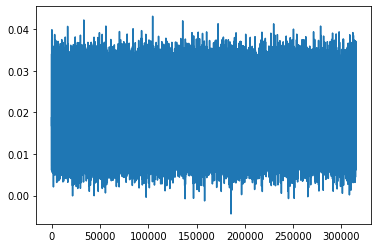

In [35]:
mu=0.02 #noise mean
std=0.005  #noise std

noise=np.reshape(np.random.normal(mu,std,np.shape(x)[0]*np.shape(x)[1]),(np.shape(x)[0],np.shape(x)[1]))
#testl1=tvdenoise(x+noise,0.1,20,opt='l1')
#testl2=tvdenoise(x+noise,0.1,20,opt='iso',plot=1)
im=x+noise
options.maxIter=100
options.tauhess=0.01
#[out,re,P,R] = hessian_prox(grad_handle,prox_handle,xinit,x+noise,options,plot=0)
# for i in range(20):
    
#     testtvhar=tv2d_aniso_haar(im,0.1,1)
#     im=testtvhar
plt.plot(np.ravel(noise))

In [ ]:
Hnp = Hnp.squeeze(axis=2) # Take out z-dimension for 2D
assert Hnp.shape == (486, 648, 24)

In [ ]:
Hconjnp = Hconjnp.squeeze(axis=2) # Take out z-dimension for 2D
assert Hconjnp.shape == (486, 648, 24)

In [41]:
y = x

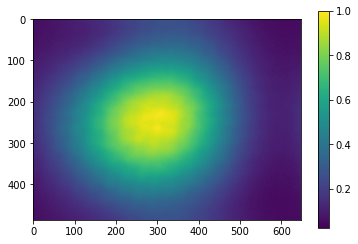

In [39]:
#y=A_2d(x,psf,nopad)#,rcL,rcU,ccL,ccU)
#y=crop2d(A_2d_svd(x,H[:,:,0,:],weights[:,:,0,:],pad2d),rcL,rcU,ccL,ccU)
x3d=[x,xtrue]
x3d=np.swapaxes(np.swapaxes(x3d,0,1),1,2)

#test2=A_3d_adj_svd(test,weights[:,:,0:2,:],Hnp[:,:,0:2,:],nopad)
y3d=A_3d_svd(x3d,weights[:,:,29:31,:],Hnp[:,:,29:31,:],nopad)+noise
y3d=y3d/np.max(y3d)
#ysim=A_2d_svd(x,Hnp,weights[:,:,29,:],nopad)#,rcL,rcU,ccL,ccU)
#y=A_2d(x,H[:,:,0,:],weights[:,:,0,:],pad2d)
#x_adj=crop2d(A_2d_adj(Hconj[:,:,0,:],weights[:,:,0,:],x,pad2d),rcL,rcU,ccL,ccU)
#y=y/np.max(y)
plt.imshow(y3d)
plt.colorbar()


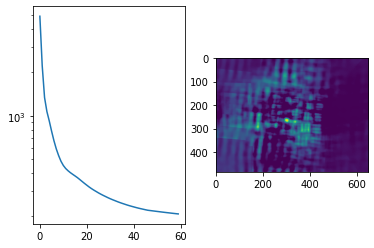

In [ ]:
#things to do: 1) implement both iterative and soft_threshholding tv (wavelets)
#(this is only ture if this is inside an algorithm that will run for a while and only equivilant in convergence over time. So a single step here is not equal to iterative tV. Also, you should not threshhold the DC componenet, only the highpass. 
#IF I am only threhshoding the finite difference, then im ignoring TV. good.)
#note TV only looks good in convergence. This means waveletTV is not a single step TV denoiser. It only works well over time, so if used as denoiser, it needs to iterate. 
#The good thing is when used with deconvolution, it is already in a loop so single step is good. 

class settings(object):
     def __init__(self,stepsize,tau,tautv,tauwav,maxIter,residTol,convTol,plotting,proxnum,reg,tauhess,hess, dim):
            self.convTol=convTol
            self.maxIter=maxIter
            self.residTol=residTol
            self.stepsize=stepsize
            self.plotting=plotting
            self.tau=tau #L1 tau
            self.proxnum=proxnum
            self.reg=reg #this is regularizer for projected fista: l1,tv_l1,tv_iso or l1_tv_l1 (parallel projected fista L1 and TV iso) or l1_tv_iso
            self.tautv=tautv  #tv tau
            self.tauwav=tauwav
            
            self.tauhess=tauhess
            self.hess=hess
            self.dim=dim
            

dim='2d'
convTol = 0#15e-6 #wase-4
maxIter =  100
residTol = 5e-5
stepsize = 6e-2#for 2d 6e-2 #shift varying simulation  #5e-7 for shift invariant
plotting=1
tau=0.0001#*stepsize #*stepsize is just for prox_decomp, remove for the rest
tautv=0.0002 #same value for iterative vs haar
tauwav=0.0001
tauhess=0.0001 #hessian regularizer
proxnum=4
reg='tv_haar'
hess='fro_norm'
#reg='l1'
options= settings(stepsize,tau,tautv,tauwav,maxIter,residTol,convTol,plotting,proxnum,reg,tauhess,hess,dim)

n=np.shape(x)[0]


if options.dim=='2d':
    xinit=np.zeros((np.shape(x)[0],np.shape(x)[1]))
    #A = lambda x:crop2d(A_2d_svd(x,H,weights[:,:,29,:],pad2d),rcL,rcU,ccL,ccU)
    #Aadj = lambda y: crop2d(A_2d_adj_svd(Hconj,weights[:,:,29,:],y,pad2d),rcL,rcU,ccL,ccU)
    A = lambda x:A_2d_svd(x,Hnp[:,:,0,:],weights[:,:,0,:],nopad)
    Aadj = lambda y: A_2d_adj_svd(Hconjnp[:,:,0,:],weights[:,:,0,:],y,nopad)
    grad_handle = lambda x:linear_gradient_b(x, A, Aadj, y)  #this computes At(Ax-b) and returns it and also cost (Ax-b)
    #prox_handle= lambda x:(0.5*(np.maximum(x,0))+0.5*soft_thresh(x,options.tau*stepsize),options.tau*np.sum(np.abs(x)))
    #prox_handle= lambda x:(soft_thresh(x,options.tau*stepsize),options.tau*np.sum(np.abs(x)))
    prox_handle= lambda x: tvdenoise(x,options.tautv*stepsize,10, opt='iso',plot=0)
    #handles for prox_decomp
    Afor = lambda x: x+Aadj(A(x))*options.proxnum
    # prox1= lambda x: np.maximum(x,0)
    # prox2= lambda x: soft_thresh(x,options.tau*prox_decomp_handle.proxnum)
    # prox3= lambda x:conjgrad(Afro,x+Aadj(y)*prox_decomp_handle.proxnum,xinit,10)

    t0 = time.time()
    #[xhat, loss_total,loss_df,loss_norm] = fista_nonneg(grad_handle,prox_handle,xinit,y,options)
    #xhat=prox_decomp(grad_handle,prox_handle,Aadj,Afor,xinit,y,options)
    [xhat, loss_total,loss_df,loss_norm,t_vis] = projected_fista(grad_handle,prox_handle,xinit,y,options)
    #[xhat, loss_total,loss_df,loss_norm,t_vis] = parallel_projected_fista(grad_handle,prox_handle,xinit,y,options)
    #[xhat, loss_total,loss_df,loss_norm] = fista(grad_handle,prox_handle,xinit,y,options)
    #[xhat, loss_total,loss_df,loss_norm] = parallel_prox(grad_handle,prox_handle,xinit,ysim,options)

    t1 = time.time()

    total_time = t1-t0
    print(total_time)
    
elif options.dim=='3d':
#     x=[x,x]
#     x=np.swapaxes(np.swapaxes(x,0,1),1,2)
    xinit=np.zeros((np.shape(x3d)[0],np.shape(x3d)[1], np.shape(x3d)[2]))
    #test2=A_3d_adj_svd(test,weights[:,:,0:2,:],Hnp[:,:,0:2,:],nopad)
    A = lambda x:A_3d_svd(x,weights[:,:,29:31,:],Hnp[:,:,29:31,:],nopad)
    Aadj = lambda y: A_3d_adj_svd(y,weights[:,:,29:31,:],Hnp[:,:,29:31,:],nopad)
    grad_handle = lambda x:linear_gradient_b(x, A, Aadj, y)  #this computes At(Ax-b) and returns it and also cost (Ax-b)
    #prox_handle= lambda x: tvdenoise(x,options.tautv*stepsize,10, opt='iso',plot=0)
    prox_handle= lambda x:tv3d_iso_haar(x,0.0001*options.stepsize,1,plot=0)
    #prox_handle= lambda x:(soft_thresh(x,0.0001*options.stepsize),np.sum(np.abs(x)))
    #handles for prox_decomp
    Afor = lambda x: x+Aadj(A(x))*options.proxnum
    
    
    t0 = time.time()
    #[xhat, loss_total,loss_df,loss_norm] = fista_nonneg(grad_handle,prox_handle,xinit,y,options)
    #xhat=prox_decomp(grad_handle,prox_handle,Aadj,Afor,xinit,y,options)
    [xhat, loss_total,loss_df,loss_norm,t_vis] = projected_fista(grad_handle,prox_handle,xinit,y,options)
    #[xhat, loss_total,loss_df,loss_norm,t_vis] = parallel_projected_fista(grad_handle,prox_handle,xinit,y,options)
    #[xhat, loss_total,loss_df,loss_norm] = fista(grad_handle,prox_handle,xinit,y,options)
    #[xhat, loss_total,loss_df,loss_norm] = parallel_prox(grad_handle,prox_handle,xinit,ysim,options)

    t1 = time.time()

    total_time = t1-t0
    print(total_time)
    

#plt.imshow(xhat)



#TVnorm3d = @(x)sum(sum(sum(abs(x))));
#prox_handle = @(x)deal(.5*tv2d_aniso_haar(x,params.tau1*options.stepsize) +.5*max(x,0), params.tau1*options.stepsize*TVnorm(x));

#

#other prox
# #3d prox
# prox_handle = @(x)deal(1/2*(max(x,0) + (tv3d_iso_Haar((x), params.tau1, params.z_tv_weight))), params.tau1*TVnorm3d(x));
# #2d prox

# prox_handle = @(x)deal(.5*(soft(x,params.tau_soft) +tv3d_iso_Haar(x, params.tau1, params.z_tv_weight)),params.tau1*TVnorm3d(x));
            
# prox_handle = @(x)deal(soft(tv3d_iso_Haar(x, params.tau1, params.z_tv_weight),params.tau_soft),params.tau1*TVnorm3d(x));





# params.tau1 = gpuArray(params.tau1);
# params.tau_soft = gpuArray(params.tau_soft);
# tau_iso = gpuArray(tau_iso);
# params.z_tv_weight = gpuArray(params.z_tv_weight);
# options.stepsize = gpuArray(options.stepsize);

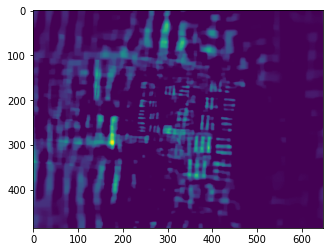

In [44]:
plt.imshow(xhat[:,:])

In [ ]:
plt.imshow(xhat[:,:,0])

In [ ]:
#L1 only result
plt.imshow(xhat)
plt.colorbar()
xhat=xhat/np.max(xhat)
print(np.max(xhat))
plt.imsave('bear_hessp2_0_1threg.png',xhat)
#plt.plot(np.array(t_vis))

In [ ]:
plt.imsave('bear_gt.png',x)

In [ ]:
np.shape(np.zeros((np.shape(y)[0],np.shape(y)[1],2)))

In [ ]:
#L1 only result
plt.imshow(xhat)
plt.colorbar()
#plt.plot(np.array(t_vis))

In [ ]:
#tv result
plt.imshow(xhat)
plt.colorbar()
#plt.plot(np.array(t_vis))

In [ ]:
#wavelet result
plt.imshow(xhat)
plt.colorbar()
#plt.plot(np.array(t_vis))

In [ ]:
plt.imshow(xhat)
plt.colorbar()
#plt.plot(np.array(t_vis))

In [ ]:
plt.imshow(xhat)
plt.colorbar()
#plt.plot(np.array(t_vis))

In [ ]:
ytest2=crop2d(A_2d_svd(xtrue,H[:,:,29,:],weights[:,:,29,:],pad2d),rcL,rcU,ccL,ccU)
plt.subplot(1,2,1)
plt.imshow(y)
plt.colorbar()
plt.subplot(1,2,2)
plt.imshow(ytest2)
plt.colorbar()

In [ ]:
ytest=A_2d_svd(xtrue,Hnp[:,:,29,:],weights[:,:,29,:],nopad)
plt.subplot(1,2,1)
plt.imshow(y)
plt.colorbar()
plt.subplot(1,2,2)
plt.imshow(ytest/np.max(ytest),vmin=0, vmax=1)
plt.colorbar()

In [ ]:
plt.imshow(xhat)
plt.colorbar()
#plt.plot(np.array(t_vis))

In [ ]:
plt.plot(np.array(t_vis))

In [ ]:
options={}
options['convTol'] = 15e-4;
options['maxIter'] = 1000;
options['residTol'] = 5e-5;
options['momentum']= 'nesterov'
options['stepsize'] = 6e-2  #5e-7 for shift invariant
n=np.shape(x)[0]
xinit=np.zeros((np.shape(x)[0],np.shape(x)[1]))
alpha=options['stepsize']
loss=[]

##fista

pk=xinit
tk=1
for i in range(0,options['maxIter']):  

    #L=crop2d(A_2d_svd(pk,H[:,:,0,:],weights[:,:,0,:],pad2d),rcL,rcU,ccL,ccU)-y
    #wk=pk-crop2d(alpha*A_2d_adj_svd(Hconj[:,:,0,:],weights[:,:,0,:],L,pad2d),rcL,rcU,ccL,ccU)
    L=A_2d_svd(pk,Hnp[:,:,0,:],weights[:,:,0,:],nopad)-y
    wk=pk-alpha*A_2d_adj_svd(Hconjnp[:,:,0,:],weights[:,:,0,:],L,nopad)
    #L=A_2d(xinit,psf,nopad)-y
    #xinit=xinit-alpha*A_2d_adj(L,psf,nopad)
    xk1=soft_thresh(wk,options['stepsize']*0.0001)  #30 for shiftinvariant
    xk1=np.maximum(xk1,0)
    tk1 = (1+np.sqrt(1+4*tk))/2
    pk = xk1 + (tk-1)/tk1*(xk1 - xinit)
    xinit=xk1.copy();tk=tk1.copy()
    #xinit=np.maximum(xk1,0)
    loss.append(np.linalg.norm(L))
    if (np.mod(i,10)==0):
        plt.subplot(1,2,1)
        pl.plot(loss)
        display.clear_output(wait=True)
        display.display(pl.gcf())
        plt.subplot(1,2,2)
        plt.imshow(xinit)
        #time.sleep(0.005)